In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
import pickle

In [2]:
df=pd.read_csv('Datasets/final.csv')
df.head(5)

,Datetime,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,2020-03-12 13:00:00,Aizawl,25.0,31.11,7.14,1.86,11.28,24.00,0.42,4.31,0.76,1.5,4.33,51.0,Satisfactory
1,2020-03-12 14:00:00,Aizawl,19.0,29.17,7.32,1.15,10.85,27.59,0.44,4.65,0.07,1.5,4.33,52.0,Satisfactory
2,2020-03-12 15:00:00,Aizawl,24.0,30.00,7.14,1.04,10.51,31.13,0.43,4.83,0.67,1.5,4.33,52.0,Satisfactory
3,2020-03-12 16:00:00,Aizawl,25.0,32.08,7.20,1.19,10.74,33.31,0.46,5.26,0.05,1.5,4.33,53.0,Satisfactory
4,2020-03-12 17:00:00,Aizawl,33.0,41.00,7.22,1.37,10.93,30.05,0.50,5.39,0.02,1.5,4.33,54.0,Satisfactory


In [3]:
df.shape

(239322, 15)

In [4]:
df.isnull().sum()

Datetime      10654
City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
AQI               0
AQI_Bucket        0
dtype: int64

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000,239322.000000
mean,61.813510,125.092535,18.531356,33.339782,36.709078,23.418141,1.039834,11.270571,38.721834,4.141433,10.064720,143.422594
std,62.803755,103.770181,33.829649,25.601033,40.002762,18.960396,1.464409,10.426656,29.183399,21.101855,23.906228,99.630428
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,8.000000
25%,25.550000,58.000000,3.800000,15.340000,14.780000,11.140000,0.500000,5.530000,17.810000,0.630000,1.820000,76.000000
50%,44.120000,95.800000,7.980000,26.880000,24.490000,18.050000,0.740000,8.640000,31.050000,1.500000,4.330000,110.000000
75%,72.980000,153.190000,16.770000,43.930000,41.900000,30.600000,1.090000,13.330000,52.430000,3.630000,10.910000,173.000000
max,999.990000,1000.000000,498.970000,380.020000,493.400000,485.820000,47.420000,199.930000,497.620000,498.070000,498.070000,762.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239322 entries, 0 to 239321
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Datetime    228668 non-null  object 
 1   City        239322 non-null  object 
 2   PM2.5       239322 non-null  float64
 3   PM10        239322 non-null  float64
 4   NO          239322 non-null  float64
 5   NO2         239322 non-null  float64
 6   NOx         239322 non-null  float64
 7   NH3         239322 non-null  float64
 8   CO          239322 non-null  float64
 9   SO2         239322 non-null  float64
 10  O3          239322 non-null  float64
 11  Benzene     239322 non-null  float64
 12  Toluene     239322 non-null  float64
 13  AQI         239322 non-null  float64
 14  AQI_Bucket  239322 non-null  object 
dtypes: float64(12), object(3)
memory usage: 27.4+ MB


In [7]:
#Handle missing Datetime values
df = df.dropna(subset=['Datetime'])

In [8]:
# Convert Datetime to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract temporal features
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday
df['weekofyear'] = df['Datetime'].dt.isocalendar().week
df['dayofyear'] = df['Datetime'].dt.dayofyear

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228668 entries, 0 to 228667
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Datetime    228668 non-null  datetime64[ns]
 1   City        228668 non-null  object        
 2   PM2.5       228668 non-null  float64       
 3   PM10        228668 non-null  float64       
 4   NO          228668 non-null  float64       
 5   NO2         228668 non-null  float64       
 6   NOx         228668 non-null  float64       
 7   NH3         228668 non-null  float64       
 8   CO          228668 non-null  float64       
 9   SO2         228668 non-null  float64       
 10  O3          228668 non-null  float64       
 11  Benzene     228668 non-null  float64       
 12  Toluene     228668 non-null  float64       
 13  AQI         228668 non-null  float64       
 14  AQI_Bucket  228668 non-null  object        
 15  hour        228668 non-null  int32         
 16  day    

In [10]:
#One-hot encode cities
cities = df['City'].unique()
city_dummies = pd.get_dummies(df['City'], prefix='City')
df = pd.concat([df, city_dummies], axis=1)

In [11]:
# Drop unnecessary columns
df.drop(columns=['Datetime', 'City', 'AQI_Bucket'], inplace=True)

In [12]:
# Handle any remaining missing values
df.fillna(df.median(), inplace=True)

In [13]:
# Define features and target variable
X = df.drop(columns=['AQI'])
y = df['AQI']

#Splitting the dataset into 80-20 for train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Linear Regression Model
lrm=LinearRegression()
lrm.fit(X_train_scaled,y_train)
print("Accuracy:- ",lrm.score(X_test_scaled,y_test)*100)

Accuracy:-  78.41448881273578


In [16]:
# Decision Tree Model
dtm=DecisionTreeRegressor()
dtm.fit(X_train_scaled,y_train)
print("Accuracy:- ", dtm.score(X_test_scaled,y_test)*100)

Accuracy:-  81.87275276647966


In [17]:
# Random Forest Model
rfm=RandomForestRegressor(n_estimators=50,max_depth=10)
rfm.fit(X_train_scaled,y_train)
print("Accuracy:- ", rfm.score(X_test_scaled,y_test)*100)

Accuracy:-  85.90535936093185


In [18]:
# XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
print("Accuracy:- ", xgb.score(X_test_scaled,y_test)*100)

Accuracy:-  89.94964099538343


In [19]:
# Performance Metrics
y_pred = xgb.predict(X_test_scaled)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Accuracy:', xgb.score(X_test_scaled,y_test)*100)

Root Mean Squared Error: 31.565413603954052
Mean Absolute Error: 21.128566954014637
R2 Score: 0.8994964099538343
Accuracy: 89.94964099538343


In [20]:
# Train Linear Regression models for pollutant forecasting
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
time_cols = ['hour', 'day', 'month', 'weekday', 'weekofyear', 'dayofyear']
pollutant_models = {}
for pollutant in pollutant_cols:
    model = LinearRegression()
    model.fit(df[time_cols], df[pollutant])
    pollutant_models[pollutant] = model

In [21]:
# Save models and scaler
with open('model.sav', 'wb') as f:
    pickle.dump(xgb, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [22]:
# Function to forecast pollutants
def forecast_pollutants(pollutant_models, input_datetime):
    dt = pd.to_datetime(input_datetime)
    features = pd.DataFrame([[
        dt.hour, dt.day, dt.month, 
        dt.weekday(), dt.isocalendar().week, dt.dayofyear
    ]], columns=['hour', 'day', 'month', 'weekday', 'weekofyear', 'dayofyear'])
    predictions = {p: max(0, model.predict(features)[0]) for p, model in pollutant_models.items()}
    return predictions

In [23]:
# Function to forecast AQI
def predict_aqi_with_city(model, scaler, input_datetime, city, **pollutants):
    cities = ['Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Chandigarh', 'Chennai', 
              'Coimbatore', 'Delhi', 'Gurugram', 'Hyderabad', 'Jaipur', 'Kolkata', 
              'Patna', 'Shillong', 'Talcher', 'Visakhapatnam']
    
    #Extracting temporal features
    dt = pd.to_datetime(input_datetime)
    temporal_features = [
        dt.hour, dt.day, dt.month, 
        dt.weekday(), dt.isocalendar().week, dt.dayofyear
    ]
    
    #Create city one-hot encoding
    city_data = [1 if c == city else 0 for c in cities]
    
    #Pollutant features
    pollutant_features = [
        pollutants.get('PM2.5', 0), 
        pollutants.get('PM10', 0), 
        pollutants.get('NO', 0), 
        pollutants.get('NO2', 0), 
        pollutants.get('NOx', 0), 
        pollutants.get('NH3', 0), 
        pollutants.get('CO', 0), 
        pollutants.get('SO2', 0), 
        pollutants.get('O3', 0), 
        pollutants.get('Benzene', 0), 
        pollutants.get('Toluene', 0)
    ]
    
    #Combine all features
    input_features = pollutant_features + temporal_features + city_data
    
    #Scale and predict
    input_scaled = scaler.transform([input_features])
    predicted_aqi = model.predict(input_scaled)[0]
    
    #Classification of AQI Categories
    if predicted_aqi <= 50:
        bucket = "Good"
    elif predicted_aqi <= 100:
        bucket = "Satisfactory"
    elif predicted_aqi <= 200:
        bucket = "Moderate"
    elif predicted_aqi <= 300:
        bucket = "Poor"
    elif predicted_aqi <= 400:
        bucket = "Very Poor"
    else:
        bucket = "Severe"
    return round(predicted_aqi, 2), bucket

In [34]:
#Predict AQI, its category and pollutant levels
city = 'Jaipur'
input_date = '2025-11-06'

#Forecast pollutant levels
predicted_pollutants = forecast_pollutants(pollutant_models, input_date)

#Predict AQI using forecasted pollutants
aqi, bucket = predict_aqi_with_city(
    model=xgb,
    scaler=scaler,
    input_datetime=input_date,
    city=city,
    **predicted_pollutants
)

print(f"Predicted AQI for {city} on {input_date} is {round(aqi, 2)} µg/m³")
print("Air Quality Category:", bucket)
print(f"Forecasted pollutant levels are:")
for pollutant, value in predicted_pollutants.items():
    print(f"  {pollutant}: {round(value, 2)} µg/m³")

Predicted AQI for Jaipur on 2025-11-06 is 168.8800048828125 µg/m³
Air Quality Category: Moderate
Forecasted pollutant levels are:
  PM2.5: 78.82 µg/m³
  PM10: 134.08 µg/m³
  NO: 25.12 µg/m³
  NO2: 32.94 µg/m³
  NOx: 40.32 µg/m³
  NH3: 24.41 µg/m³
  CO: 0.9 µg/m³
  SO2: 11.19 µg/m³
  O3: 33.1 µg/m³
  Benzene: 3.79 µg/m³
  Toluene: 11.58 µg/m³


C:\Users\Guraa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
df.sample(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Coimbatore,City_Delhi,City_Gurugram,City_Hyderabad,City_Jaipur,City_Kolkata,City_Patna,City_Shillong,City_Talcher,City_Visakhapatnam
57535,56.52,73.71,14.01,5.08,13.91,6.35,0.59,10.75,6.28,5.05,...,False,False,False,False,False,False,False,False,False,False
192242,62.88,124.25,11.24,36.77,47.92,19.26,0.55,13.28,18.70,26.51,...,False,False,False,False,False,True,False,False,False,False
209979,54.50,91.50,2.83,18.75,11.22,9.42,1.03,29.32,99.00,5.25,...,False,False,False,False,False,False,False,False,False,True
187020,50.22,109.99,2.44,13.37,15.82,4.12,0.46,1.47,39.22,3.17,...,False,False,False,False,False,True,False,False,False,False
110169,51.70,137.38,26.98,52.55,53.62,29.22,0.97,9.13,35.85,2.93,...,False,True,False,False,False,False,False,False,False,False
71297,29.29,34.59,0.96,11.30,12.28,2.16,0.24,5.41,16.25,0.03,...,True,False,False,False,False,False,False,False,False,False
210658,82.25,119.75,3.85,27.50,16.27,14.18,1.05,2.25,76.48,4.15,...,False,False,False,False,False,False,False,False,False,True
53201,15.50,49.75,5.90,30.36,32.09,12.45,0.85,8.50,48.80,0.42,...,False,False,False,False,False,False,False,False,False,False
67530,36.35,56.22,6.38,13.21,19.57,40.82,0.68,5.31,15.92,0.44,...,False,False,False,False,False,False,False,False,False,False
103656,245.20,403.82,123.43,68.97,144.14,46.28,2.19,17.50,22.25,7.61,...,False,True,False,False,False,False,False,False,False,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228668 entries, 0 to 228667
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PM2.5               228668 non-null  float64
 1   PM10                228668 non-null  float64
 2   NO                  228668 non-null  float64
 3   NO2                 228668 non-null  float64
 4   NOx                 228668 non-null  float64
 5   NH3                 228668 non-null  float64
 6   CO                  228668 non-null  float64
 7   SO2                 228668 non-null  float64
 8   O3                  228668 non-null  float64
 9   Benzene             228668 non-null  float64
 10  Toluene             228668 non-null  float64
 11  AQI                 228668 non-null  float64
 12  hour                228668 non-null  int32  
 13  day                 228668 non-null  int32  
 14  month               228668 non-null  int32  
 15  weekday             228668 non-null  in

In [27]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,hour,day,month,weekday,weekofyear,dayofyear
count,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.000000,228668.0,228668.000000
mean,61.895028,125.245385,18.554708,33.380458,36.767091,23.438328,1.040646,11.269589,38.757483,4.144182,10.089447,143.599292,11.526357,15.794134,6.230041,3.011777,25.334953,174.303873
std,63.151386,104.326682,34.234616,25.783807,40.354862,19.041401,1.473336,10.519521,29.490377,21.152200,23.991399,99.784499,6.929618,8.814977,3.556015,1.995459,15.476489,108.646932
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,8.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000
25%,25.500000,57.900000,3.750000,15.290000,14.700000,11.120000,0.490000,5.500000,17.600000,0.630000,1.820000,76.000000,6.000000,8.000000,3.000000,1.000000,12.0,78.000000
50%,44.100000,95.650000,7.880000,26.790000,24.490000,18.040000,0.740000,8.600000,30.850000,1.500000,4.330000,110.000000,12.000000,16.000000,6.000000,3.000000,24.0,164.000000
75%,73.030000,153.392500,16.640000,43.980000,41.880000,30.600000,1.090000,13.310000,52.770000,3.620000,10.910000,173.000000,18.000000,23.000000,10.000000,5.000000,40.0,274.000000
max,999.990000,1000.000000,498.970000,380.020000,493.400000,485.820000,47.420000,199.930000,497.620000,498.070000,498.070000,762.000000,23.000000,31.000000,12.000000,6.000000,53.0,366.000000


In [28]:
df.shape

(228668, 34)

In [29]:
df.isnull().sum()

PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
AQI                   0
hour                  0
day                   0
month                 0
weekday               0
weekofyear            0
dayofyear             0
City_Aizawl           0
City_Amaravati        0
City_Amritsar         0
City_Bengaluru        0
City_Chandigarh       0
City_Chennai          0
City_Coimbatore       0
City_Delhi            0
City_Gurugram         0
City_Hyderabad        0
City_Jaipur           0
City_Kolkata          0
City_Patna            0
City_Shillong         0
City_Talcher          0
City_Visakhapatnam    0
dtype: int64

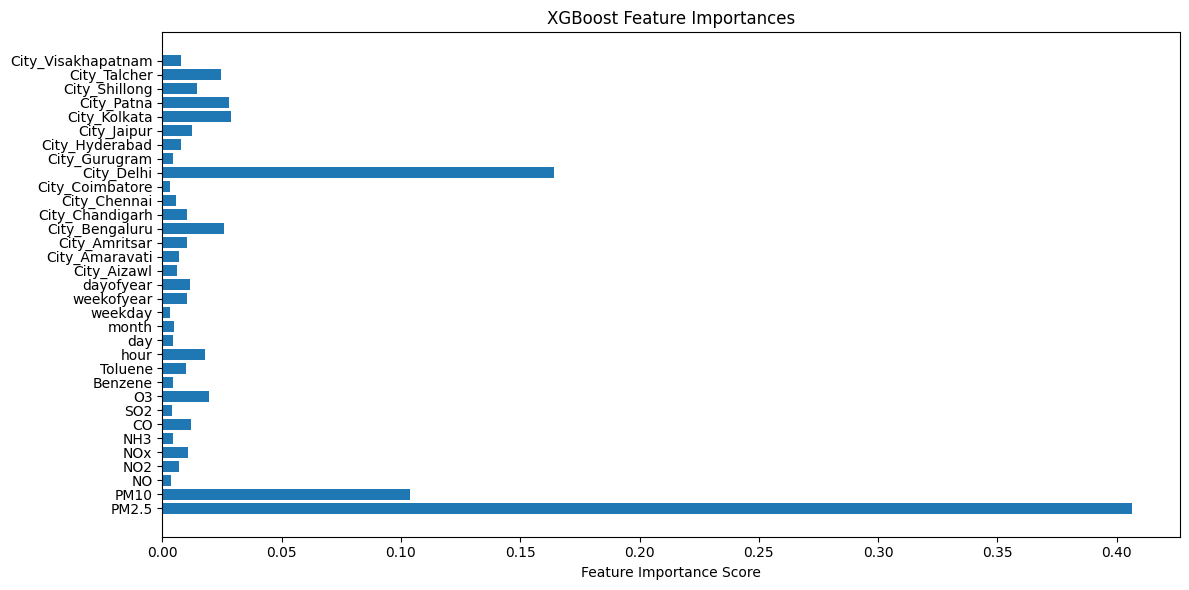

In [30]:
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
time_cols = ['hour', 'day', 'month', 'weekday', 'weekofyear', 'dayofyear']
city_cols = [f'City_{city}' for city in cities]  # you already defined 'cities' earlier

all_features = pollutant_cols + time_cols + city_cols

# Plot for feature importance
plt.figure(figsize=(12, 6))
plt.barh(all_features, xgb.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

In [31]:
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(33))

               Feature  Importance
0                PM2.5    0.406175
24          City_Delhi    0.164324
1                 PM10    0.103886
28        City_Kolkata    0.028956
29          City_Patna    0.028093
20      City_Bengaluru    0.025923
31        City_Talcher    0.024711
8                   O3    0.019481
11                hour    0.017777
30       City_Shillong    0.014513
27         City_Jaipur    0.012269
6                   CO    0.011945
16           dayofyear    0.011763
4                  NOx    0.010793
19       City_Amritsar    0.010442
21     City_Chandigarh    0.010375
15          weekofyear    0.010351
10             Toluene    0.009974
26      City_Hyderabad    0.007882
32  City_Visakhapatnam    0.007791
3                  NO2    0.007183
18      City_Amaravati    0.006898
17         City_Aizawl    0.006268
22        City_Chennai    0.005598
13               month    0.004908
12                 day    0.004589
25       City_Gurugram    0.004519
9              Benze

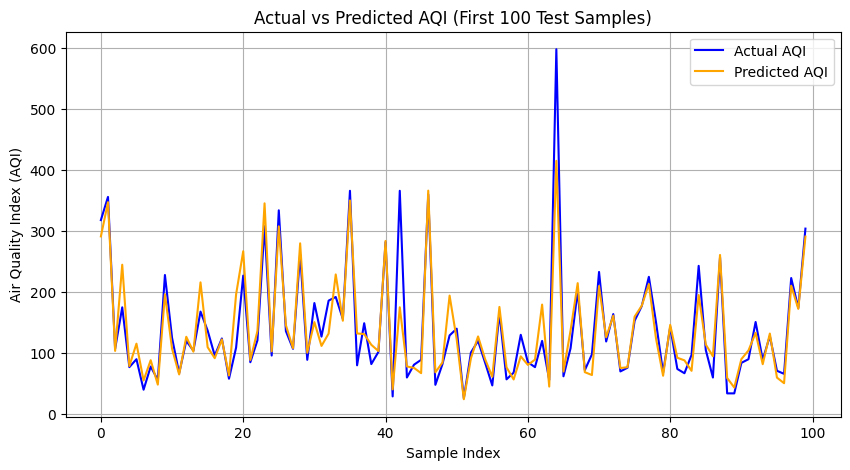

In [32]:
# Plot Actual vs Predicted AQI for a small sample
sample_size = 100
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:sample_size], label='Actual AQI', color='blue')
plt.plot(y_pred[:sample_size], label='Predicted AQI', color='orange')
plt.title(f'Actual vs Predicted AQI (First {sample_size} Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()
plt.grid(True)
plt.show()

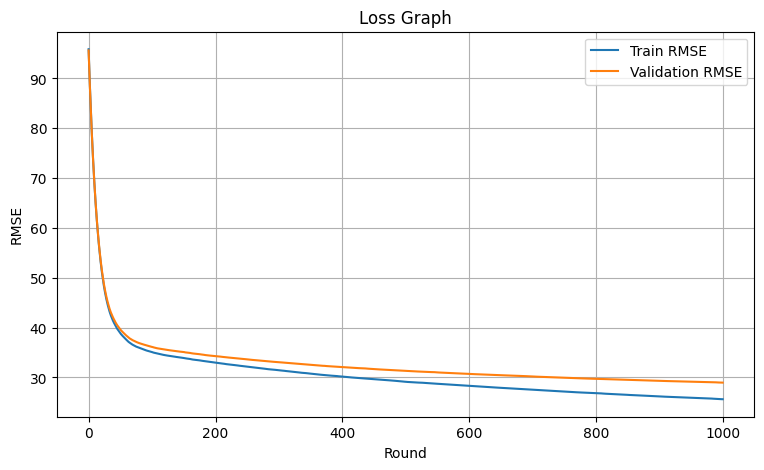

In [39]:
#Loss Graph
xgb = XGBRegressor(random_state=42, n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)], verbose=False)

# retrieve RMSE history safely
results = xgb.evals_result()
train_rmse = results.get('validation_0', {}).get('rmse', [])
val_rmse = results.get('validation_1', {}).get('rmse', [])

plt.figure(figsize=(9,5))
if train_rmse:
    plt.plot(train_rmse, label='Train RMSE', color='tab:blue')
if val_rmse:
    plt.plot(val_rmse, label='Validation RMSE', color='tab:orange')
plt.xlabel('Round')
plt.ylabel('RMSE')
plt.title('Loss Graph')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

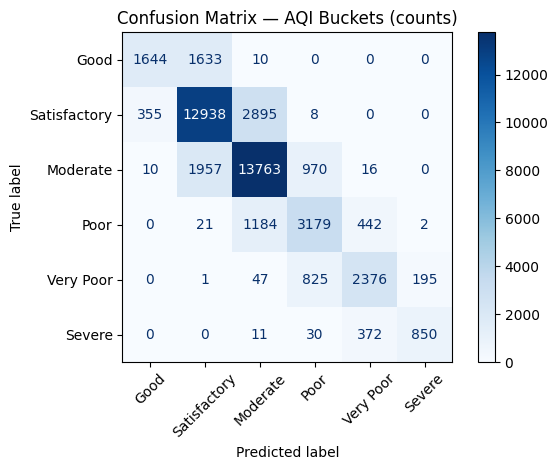

<Figure size 800x600 with 0 Axes>

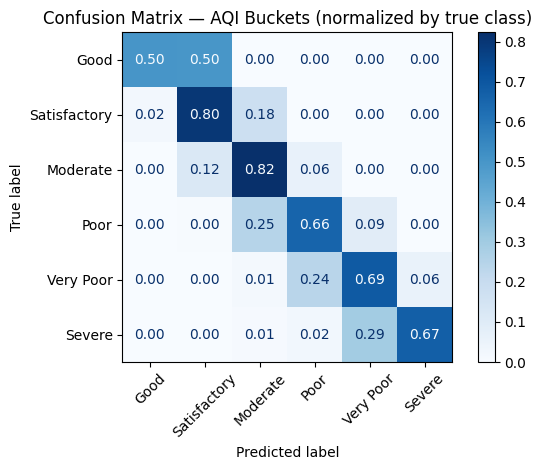

              precision    recall  f1-score   support

        Good       0.82      0.50      0.62      3287
Satisfactory       0.78      0.80      0.79     16196
    Moderate       0.77      0.82      0.79     16716
        Poor       0.63      0.66      0.65      4828
   Very Poor       0.74      0.69      0.71      3444
      Severe       0.81      0.67      0.74      1263

    accuracy                           0.76     45734
   macro avg       0.76      0.69      0.72     45734
weighted avg       0.76      0.76      0.76     45734



In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_cont = xgb.predict(X_test_scaled)
y_true = pd.Series(y_test).reset_index(drop=True)
y_pred_cont = pd.Series(y_pred_cont)

bins = [ -np.inf, 50, 100, 200, 300, 400, np.inf ]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Converting continuous AQI to categorical buckets
y_true_bucket = pd.cut(y_true, bins=bins, labels=labels, include_lowest=True)
y_pred_bucket = pd.cut(y_pred_cont, bins=bins, labels=labels, include_lowest=True)

# Confusion matrix (raw counts)
cm = confusion_matrix(y_true_bucket, y_pred_bucket, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(8,6))
disp.plot(values_format='d', cmap='Blues', xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix — AQI Buckets (counts)')
plt.tight_layout()
plt.show()

# Normalized confusion matrix (by true label)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true_bucket, y_pred_bucket, labels=labels, normalize='true'),
                                   display_labels=labels)
plt.figure(figsize=(8,6))
disp_norm.plot(values_format='.2f', cmap='Blues', xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix — AQI Buckets (normalized by true class)')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(y_true_bucket, y_pred_bucket, labels=labels, zero_division=0))
